In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier






Import the dataset

In [ ]:
df = pd.read_csv('Cancer.csv')

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
df.shape

(569, 32)

Data preprocessing


In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(columns = ['id'])

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


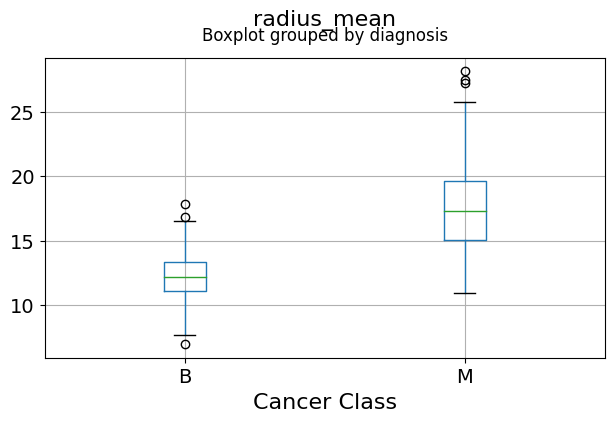

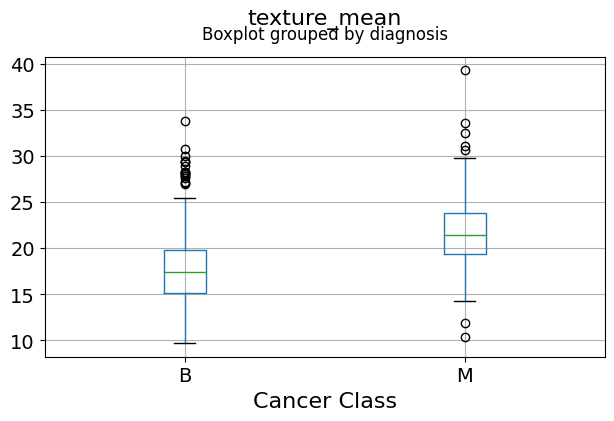

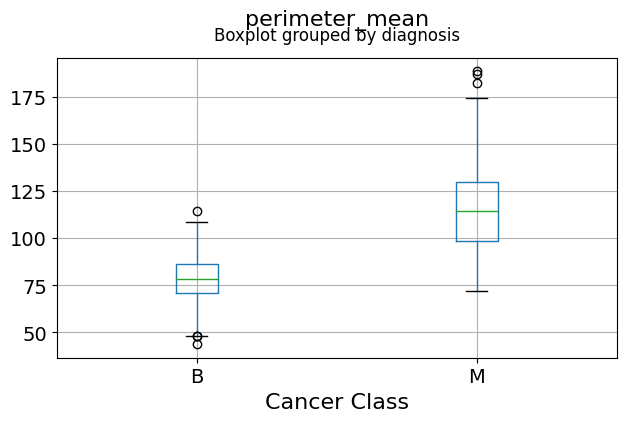

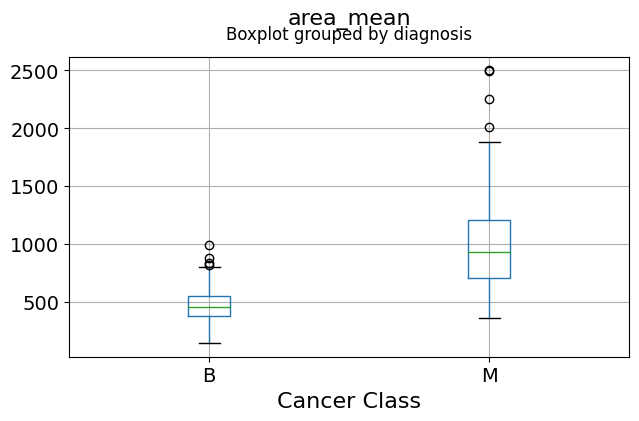

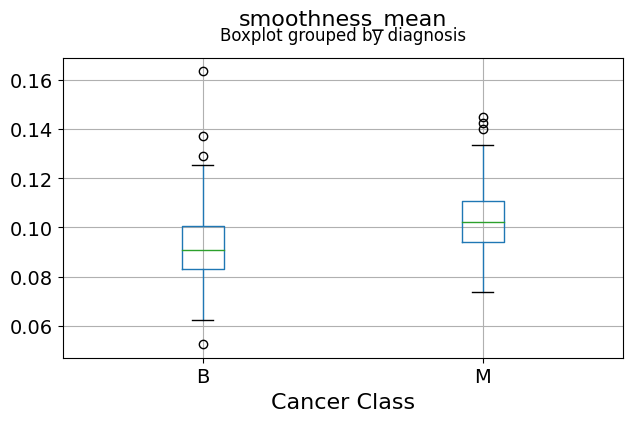

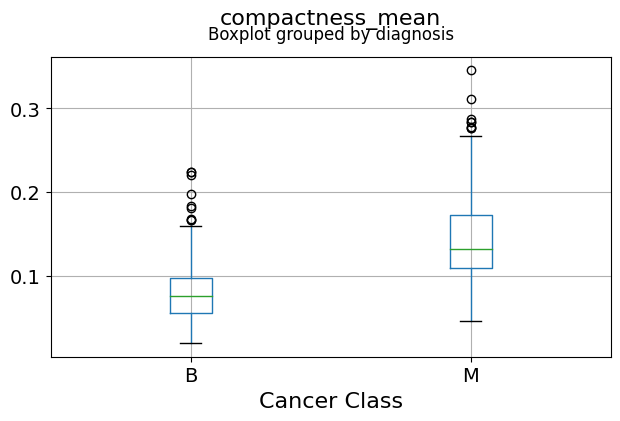

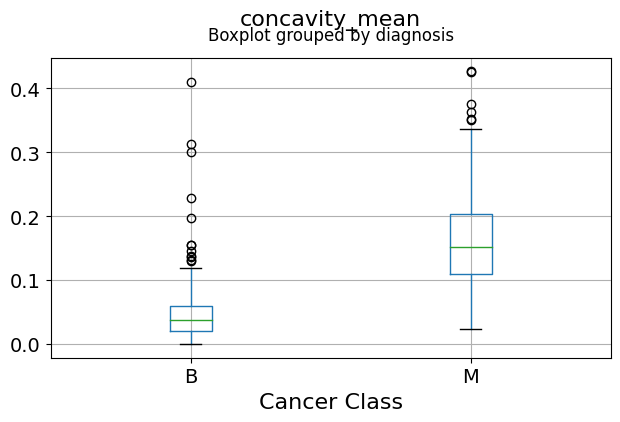

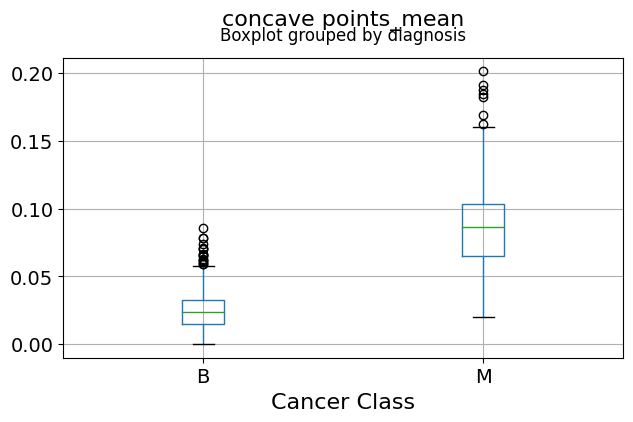

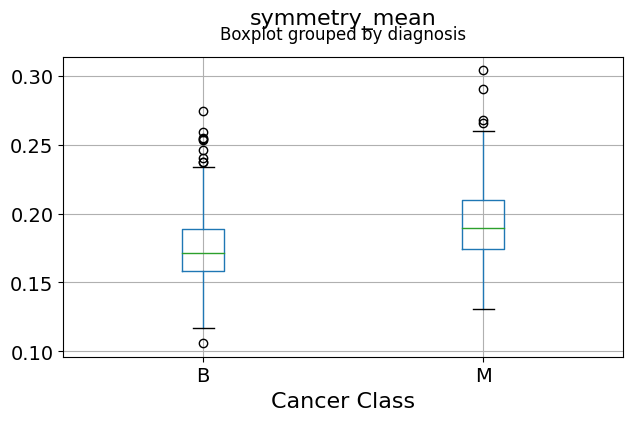

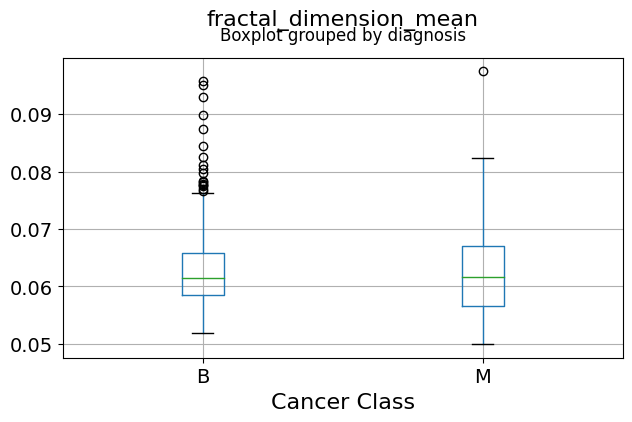

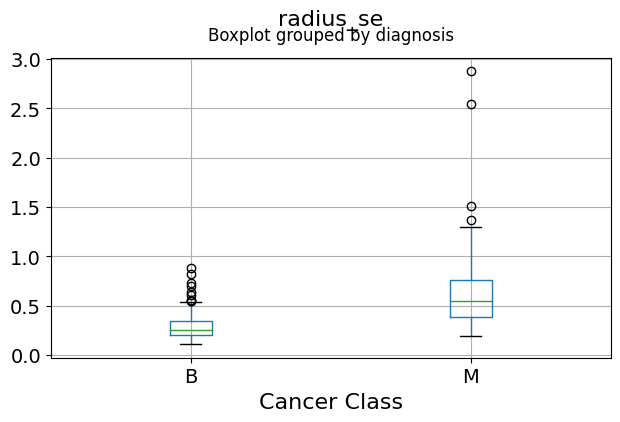

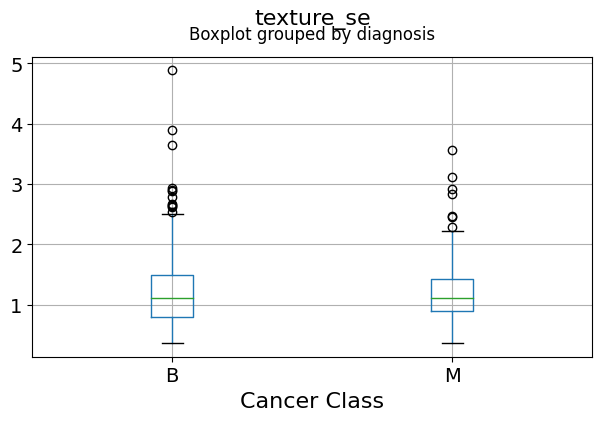

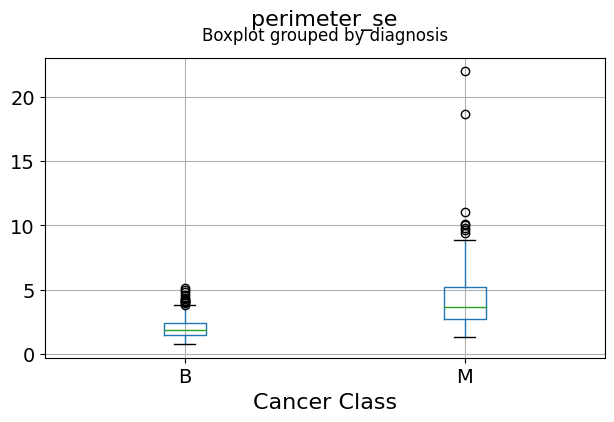

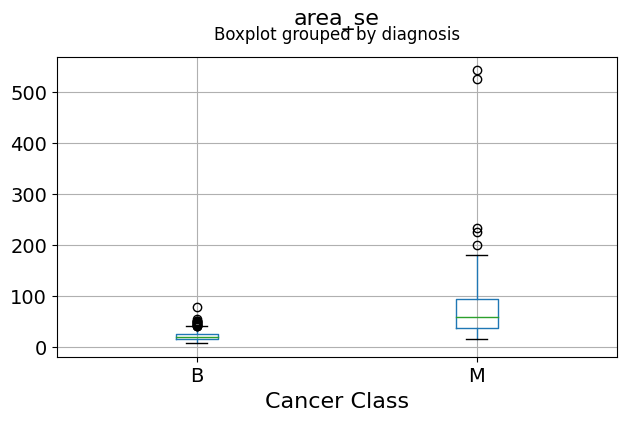

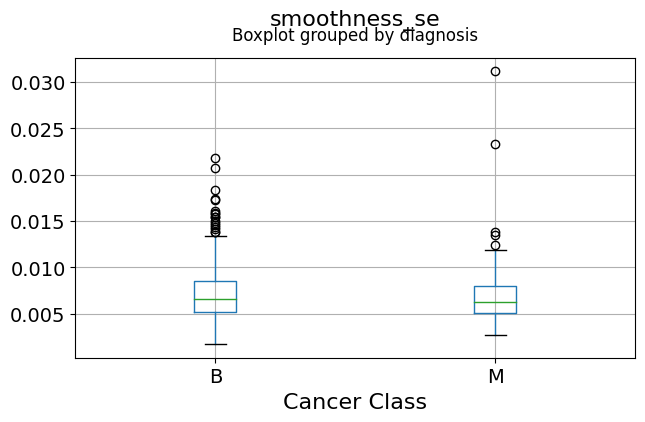

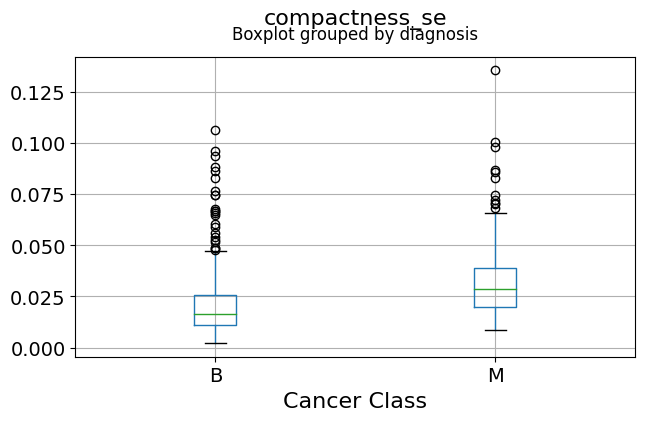

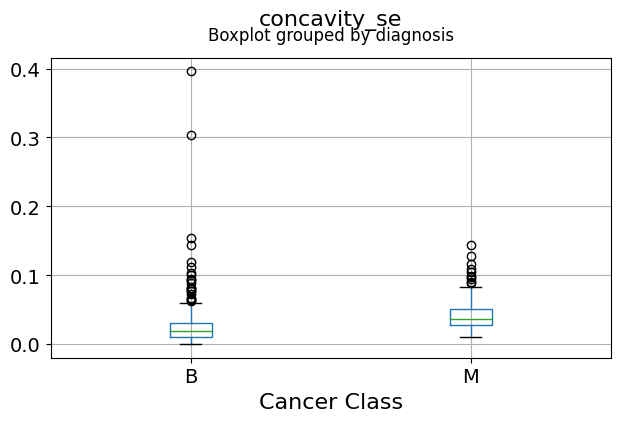

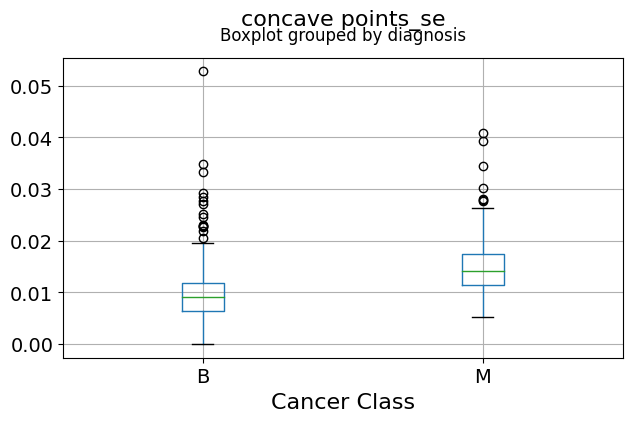

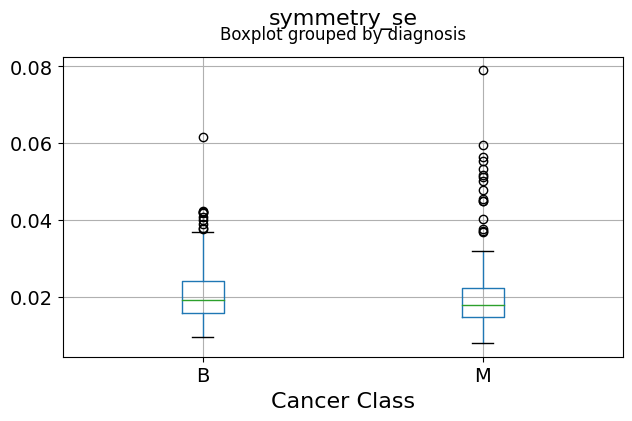

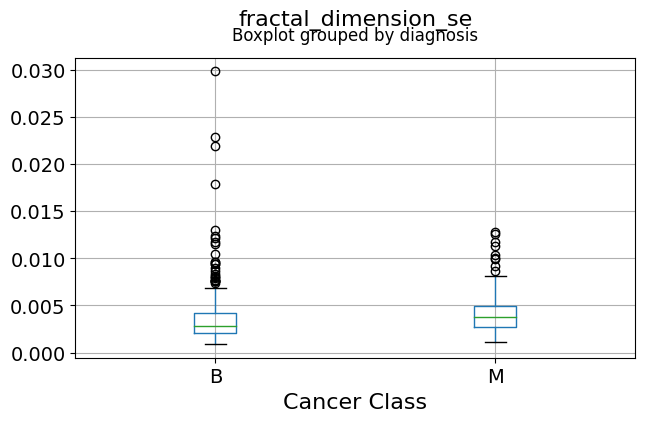

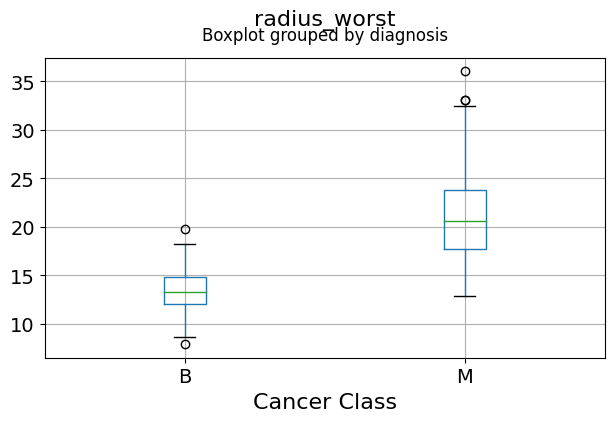

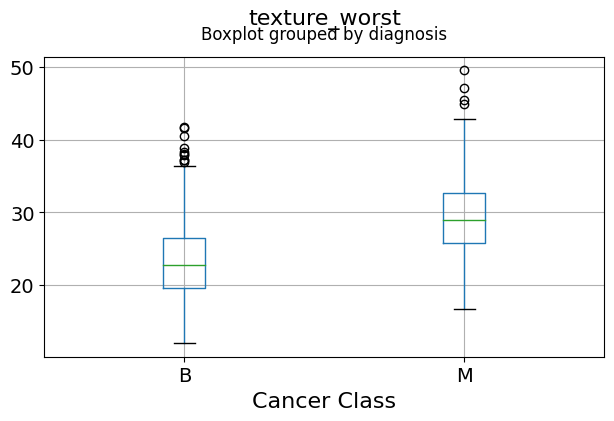

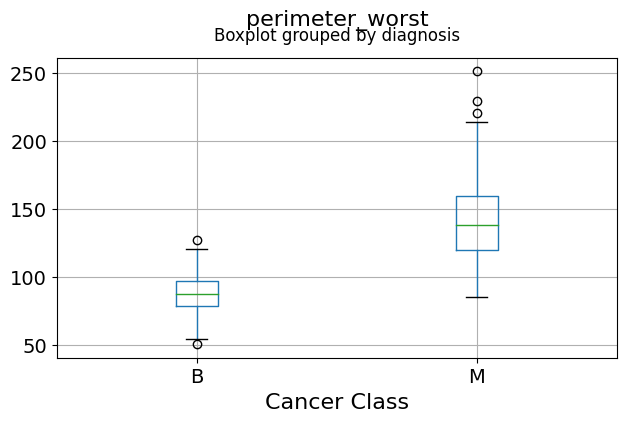

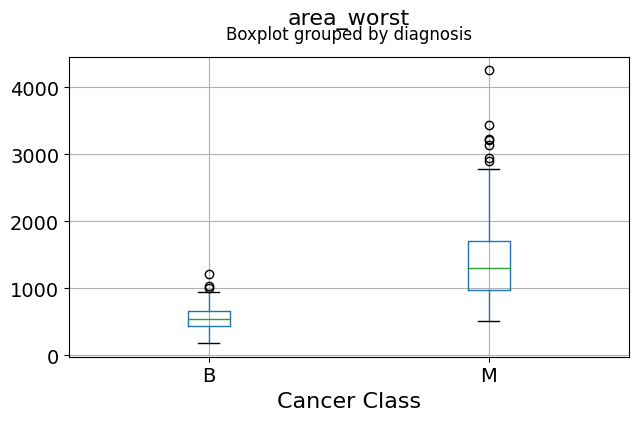

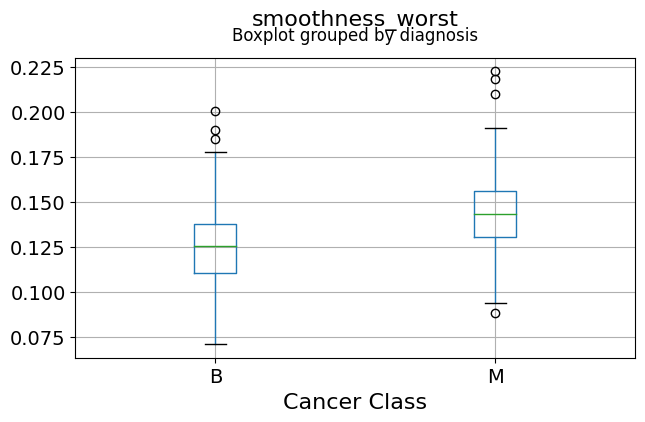

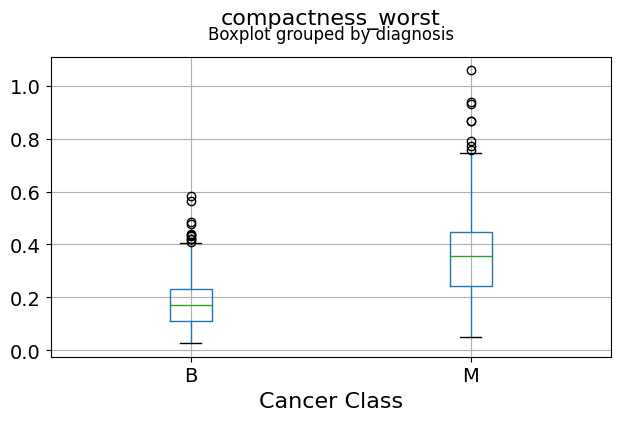

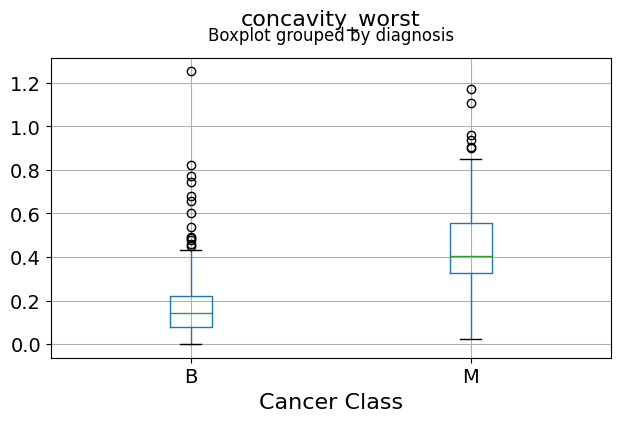

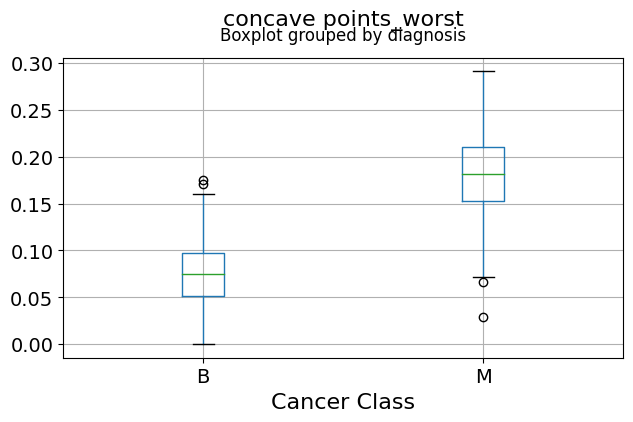

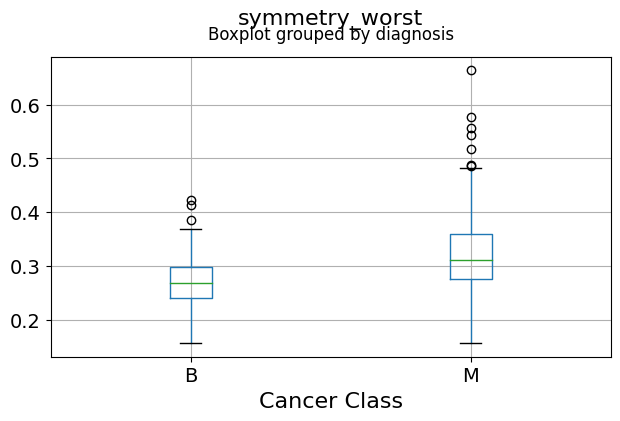

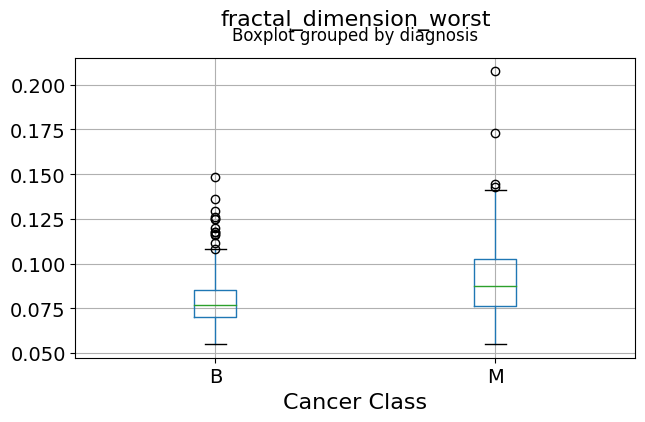

In [ ]:
#plot the data to see if there ara any outliers
for c in df.columns[1:]:
    df.boxplot(c,by='diagnosis',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Cancer Class", fontsize=16)

In [ ]:
#another way of plotting
plt.subplots(figsize=(100, 400))
sns.boxplot(data=df)

<Axes: >

Removing outliers


In [ ]:
mean = df.mean()
std = df.std()
limite_superior = mean + 3 * std
limite_inferior = mean - 3 * std
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

print("Média: ", mean)
print()
print("Desvio Padrão: ", std)
print()
print("Limite Superior: ", limite_superior)
print()
print("Limite Inferior: ", limite_inferior)
print()
print("Outliers: ", outliers)

Média:  radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
conc

<ipython-input-13-0d6ed0a08de9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-13-0d6ed0a08de9>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()
<ipython-input-13-0d6ed0a08de9>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()


In [ ]:
df_clean = df.drop(outliers.index.get_level_values(0))

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                495 non-null    object 
 1   radius_mean              495 non-null    float64
 2   texture_mean             495 non-null    float64
 3   perimeter_mean           495 non-null    float64
 4   area_mean                495 non-null    float64
 5   smoothness_mean          495 non-null    float64
 6   compactness_mean         495 non-null    float64
 7   concavity_mean           495 non-null    float64
 8   concave points_mean      495 non-null    float64
 9   symmetry_mean            495 non-null    float64
 10  fractal_dimension_mean   495 non-null    float64
 11  radius_se                495 non-null    float64
 12  texture_se               495 non-null    float64
 13  perimeter_se             495 non-null    float64
 14  area_se                  4

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


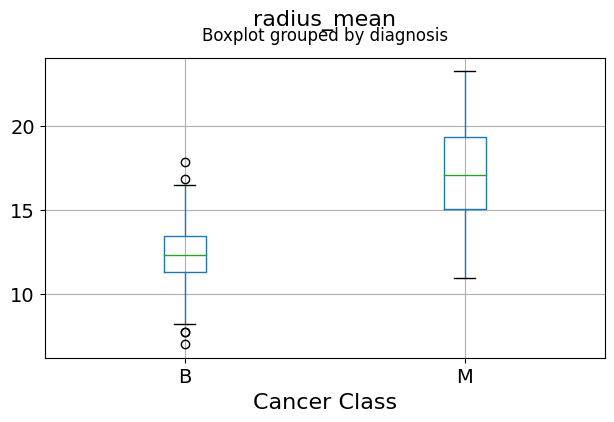

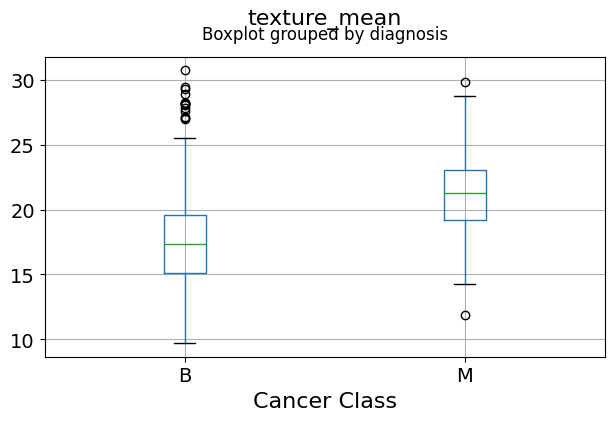

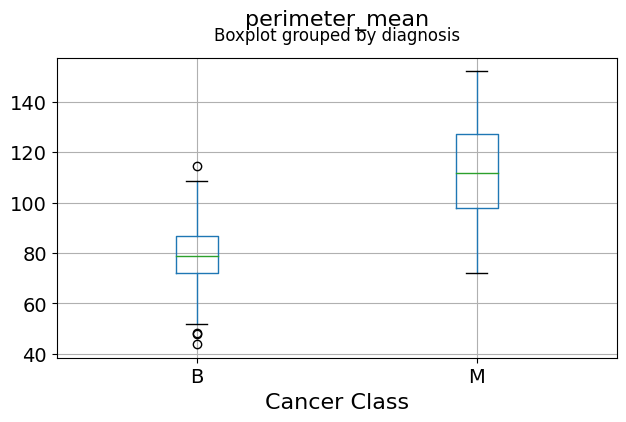

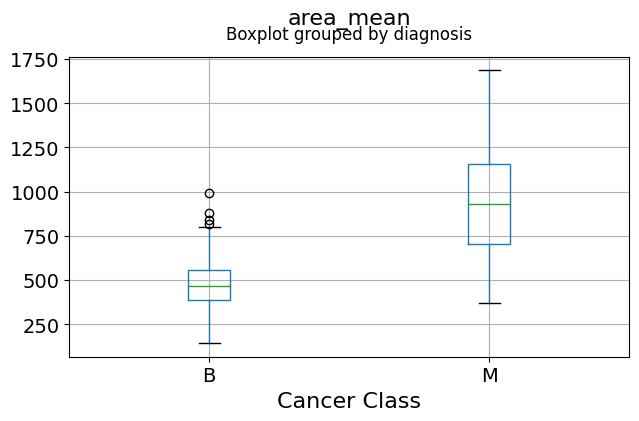

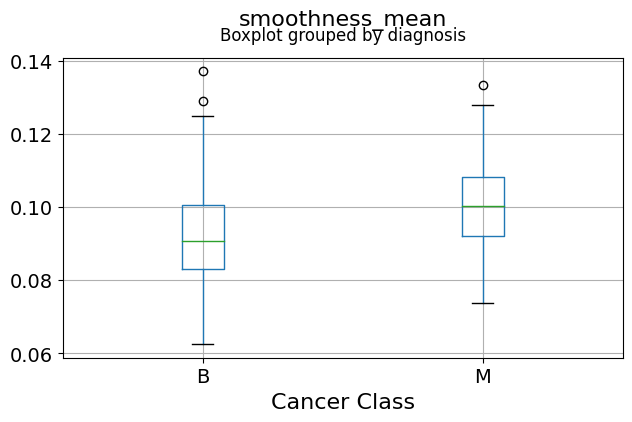

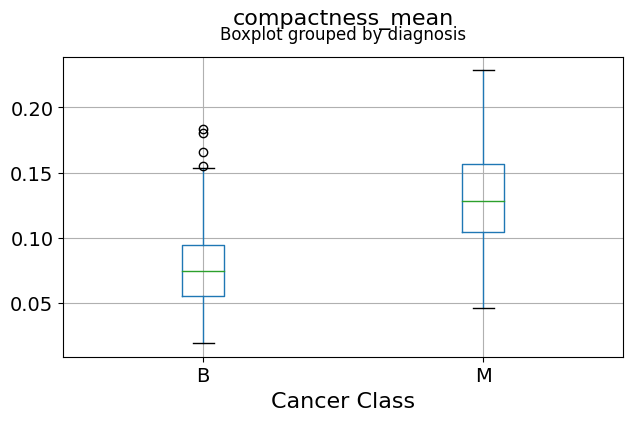

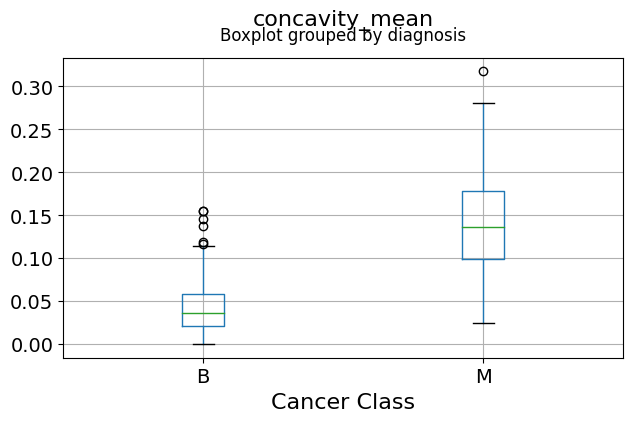

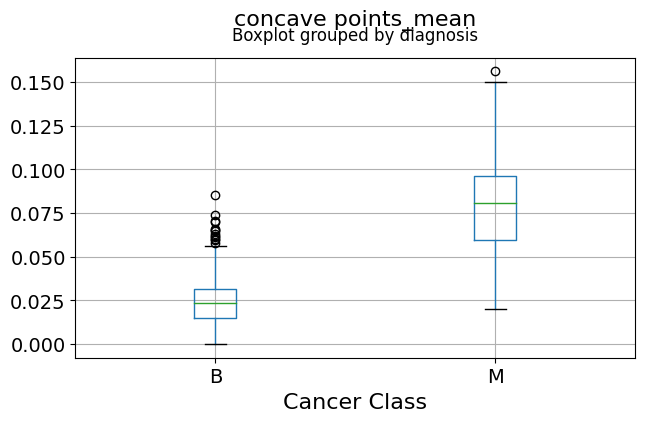

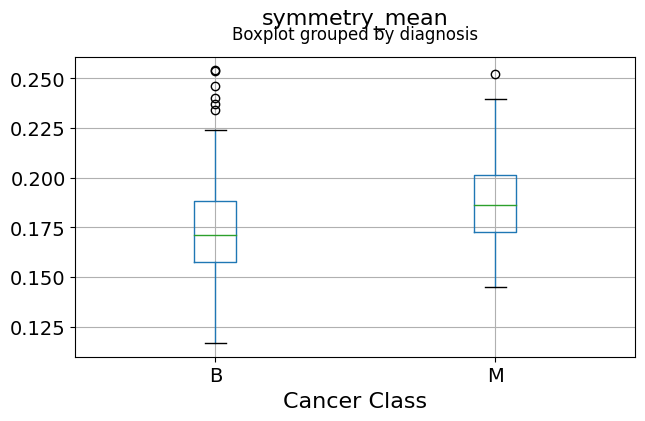

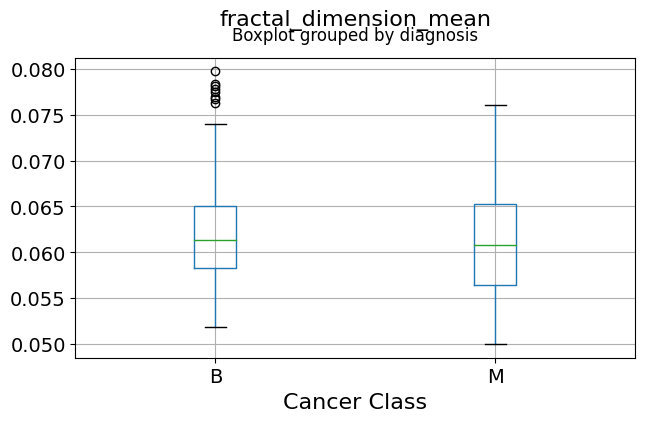

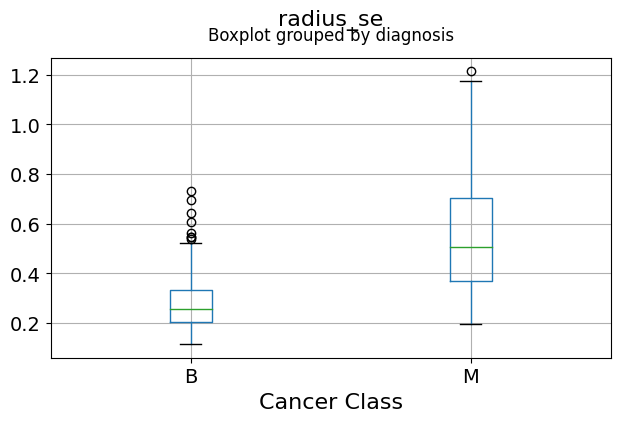

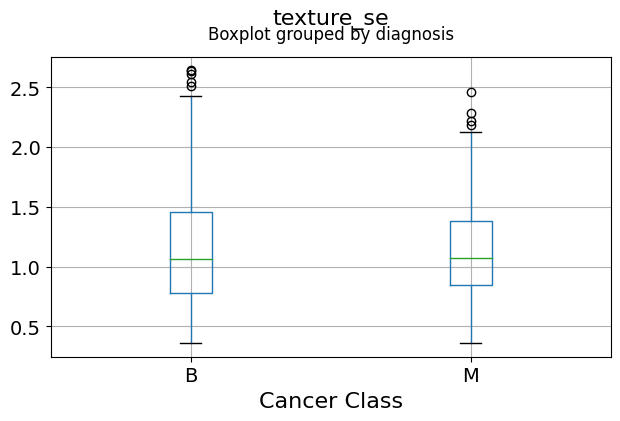

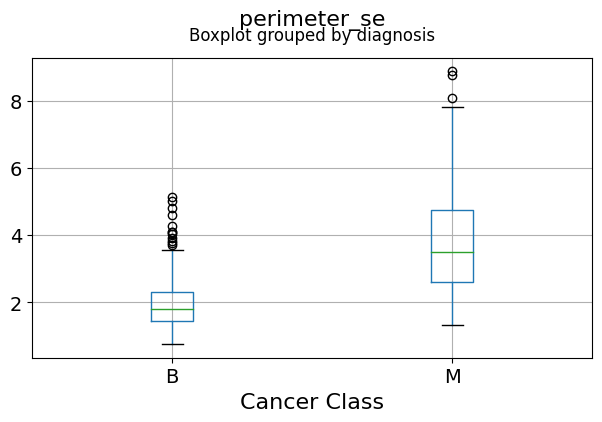

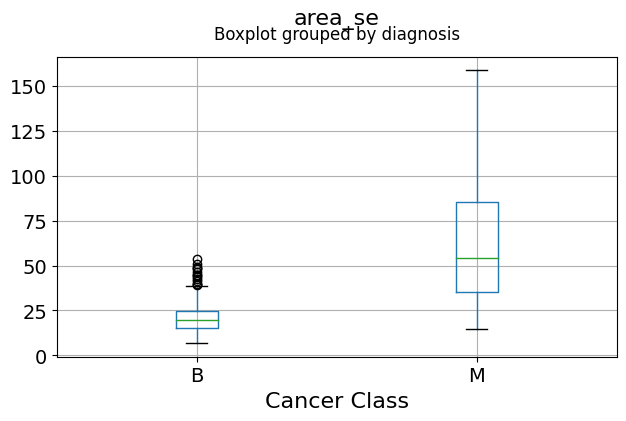

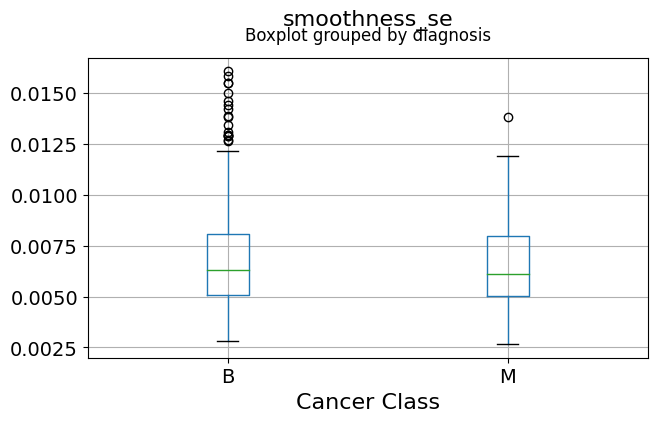

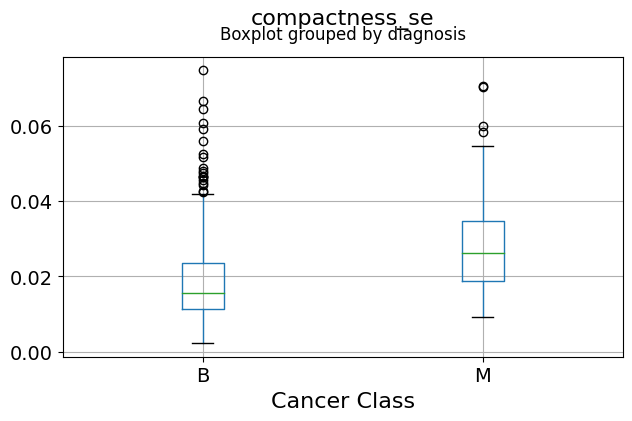

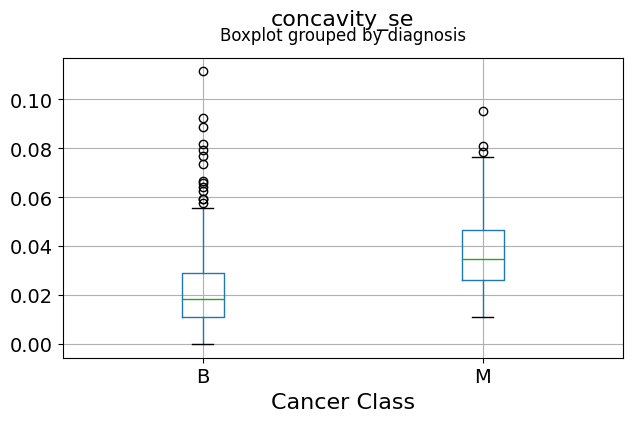

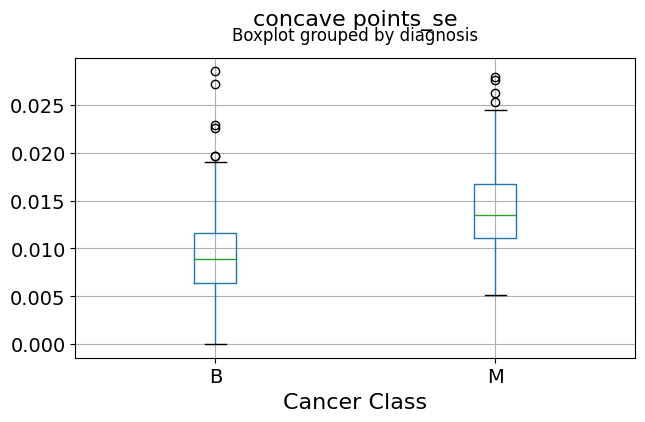

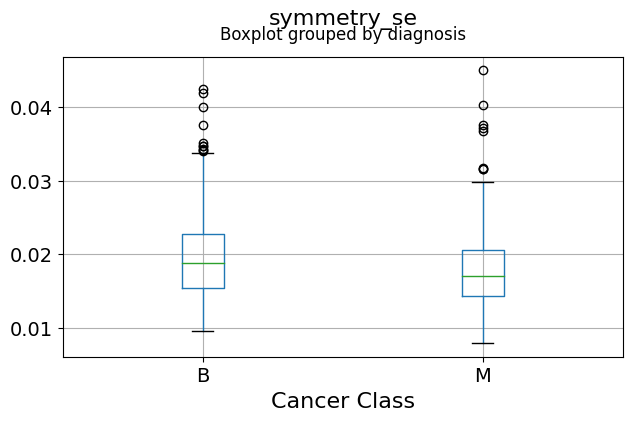

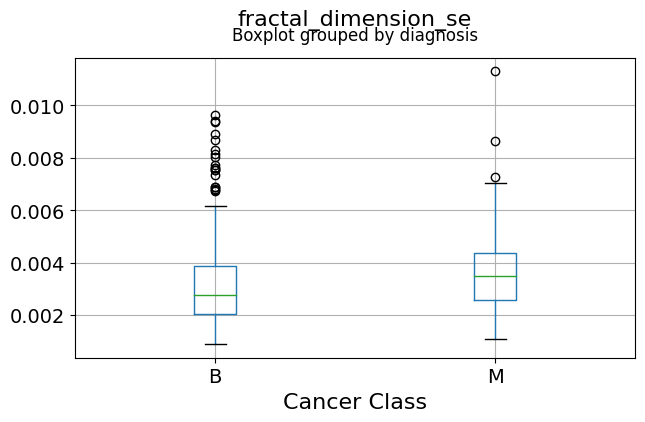

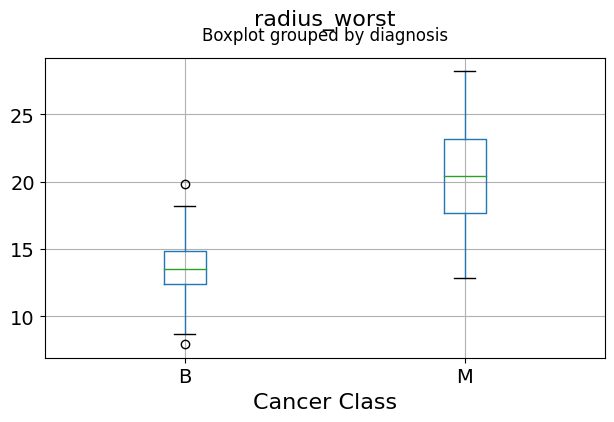

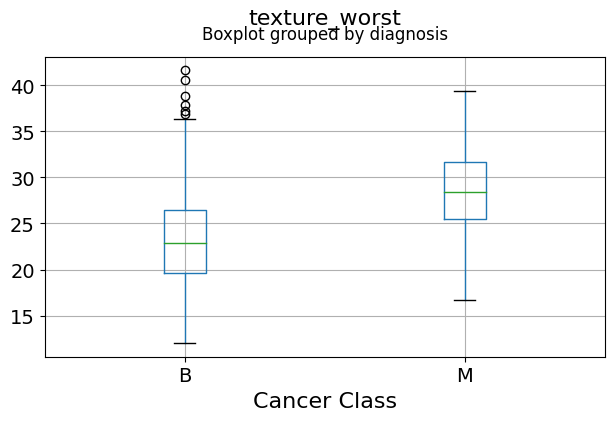

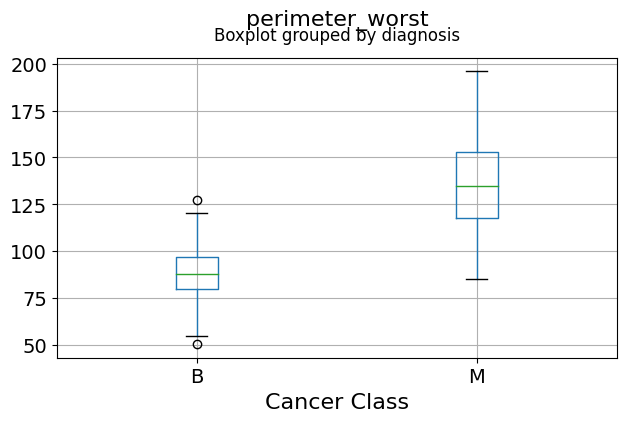

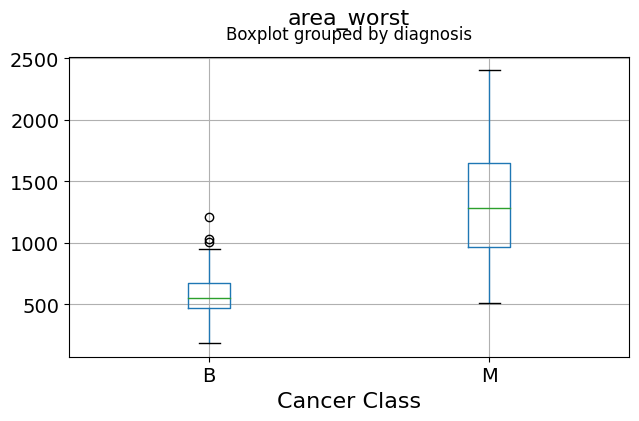

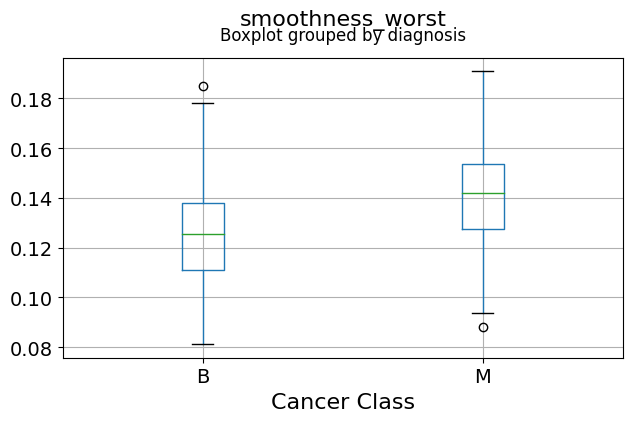

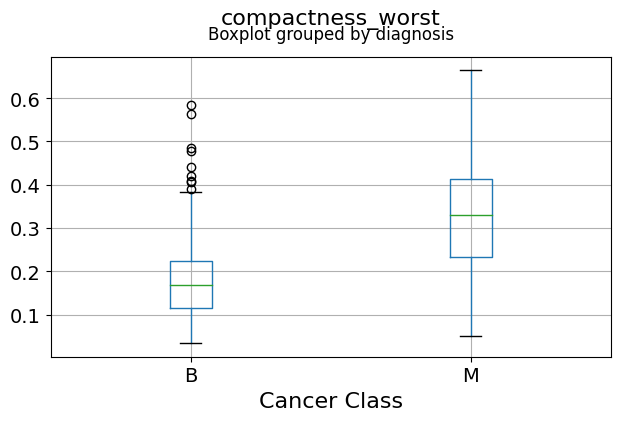

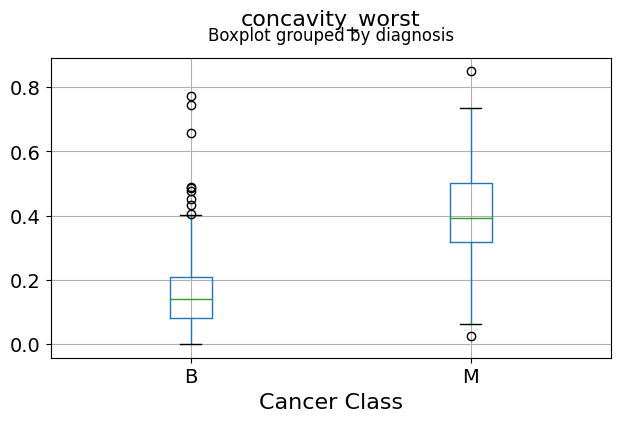

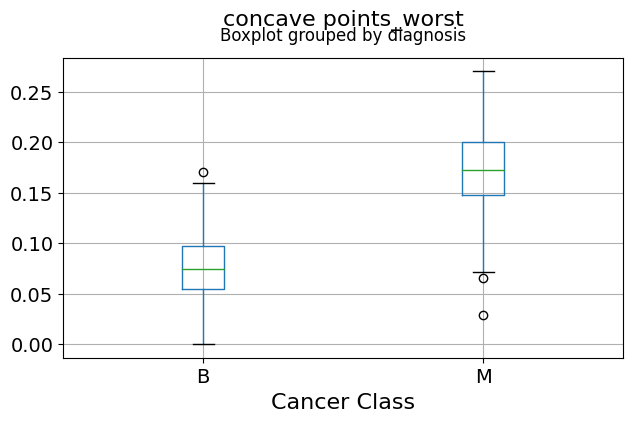

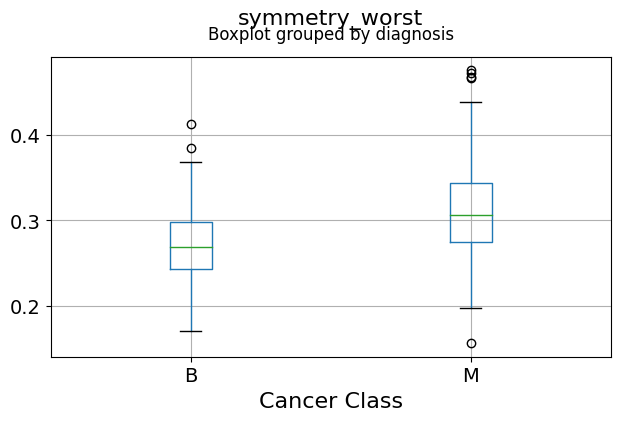

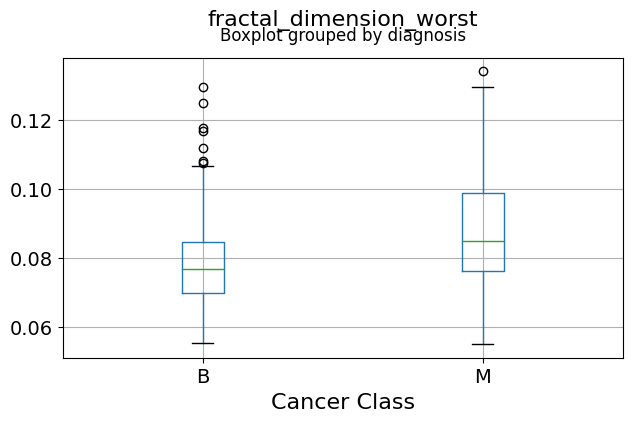

In [ ]:
for c in df_clean.columns[1:]:
    df_clean.boxplot(c,by='diagnosis',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Cancer Class", fontsize=16)

In [ ]:
# trnasform the diagnosis data to integers
# M = 1 (dangerous stage)
# B = 0 (normal stage)
le = LabelEncoder()
encoded_data = le.fit_transform(df_clean['diagnosis'])
encoded_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
# replace the diagnosis column
df_clean['diagnosis'] = encoded_data
df_clean

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
4            1        20.29         14.34          135.10     1297.0   
5            1        12.45         15.70           82.57      477.1   
6            1        18.25         19.98          119.60     1040.0   
..         ...          ...           ...             ...        ...   
560          0        14.05         27.15           91.38      600.4   
563          1        20.92         25.09          143.00     1347.0   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
4            0.10030           0.13280         0.19800              0.10430   
5            0.12780           0.17000         0.15780              0.08089   
6            0.09463           0.10900         0.11270              0.07400   
..               ...               ...             ...                  ...   
560          0.09929           0.11260         0.04462              0.04304   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1           0.1812  ...         24.99          23.41            158.8   
2           0.2069  ...         23.57          25.53            152.5   
4           0.1809  ...         22.54          16.67            152.2   
5           0.2087  ...         15.47          23.75            103.4   
6           0.1794  ...         22.88          27.66            153.2   
..             ...  ...           ...            ...              ...   
560         0.1537  ...         15.30          33.17            100.2   
563         0.2149  ...         24.29          29.41            179.1   
564         0.1726  ...         25.45          26.40            166.1   
565         0.1752  ...         23.69          38.25            155.0   
566         0.1590  ...         18.98          34.12            126.7   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1        1956.0            0.1238             0.1866           0.2416   
2        1709.0            0.1444             0.4245           0.4504   
4        1575.0            0.1374             0.2050           0.4000   
5         741.6            0.1791             0.5249           0.5355   
6        1606.0            0.1442             0.2576           0.3784   
..          ...               ...                ...              ...   
560       706.7            0.1241             0.2264           0.1326   
563      1819.0            0.1407             0.4186           0.6599   
564      2027.0            0.1410             0.2113           0.4107   
565      1731.0            0.1166             0.1922           0.3215   
566      1124.0            0.1139             0.3094           0.3403   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
4                  0.1625          0.2364                  0.07678  
5                  0.1741          0.3985                  0.12440  
6                  0.1932          0.3063                  0.08368  
..                    .

Data visualization

<ipython-input-17-07780c2cef55>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-17-07780c2cef55>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
<ipython-input-17-07780c2cef55>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-17-07780c2cef55>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


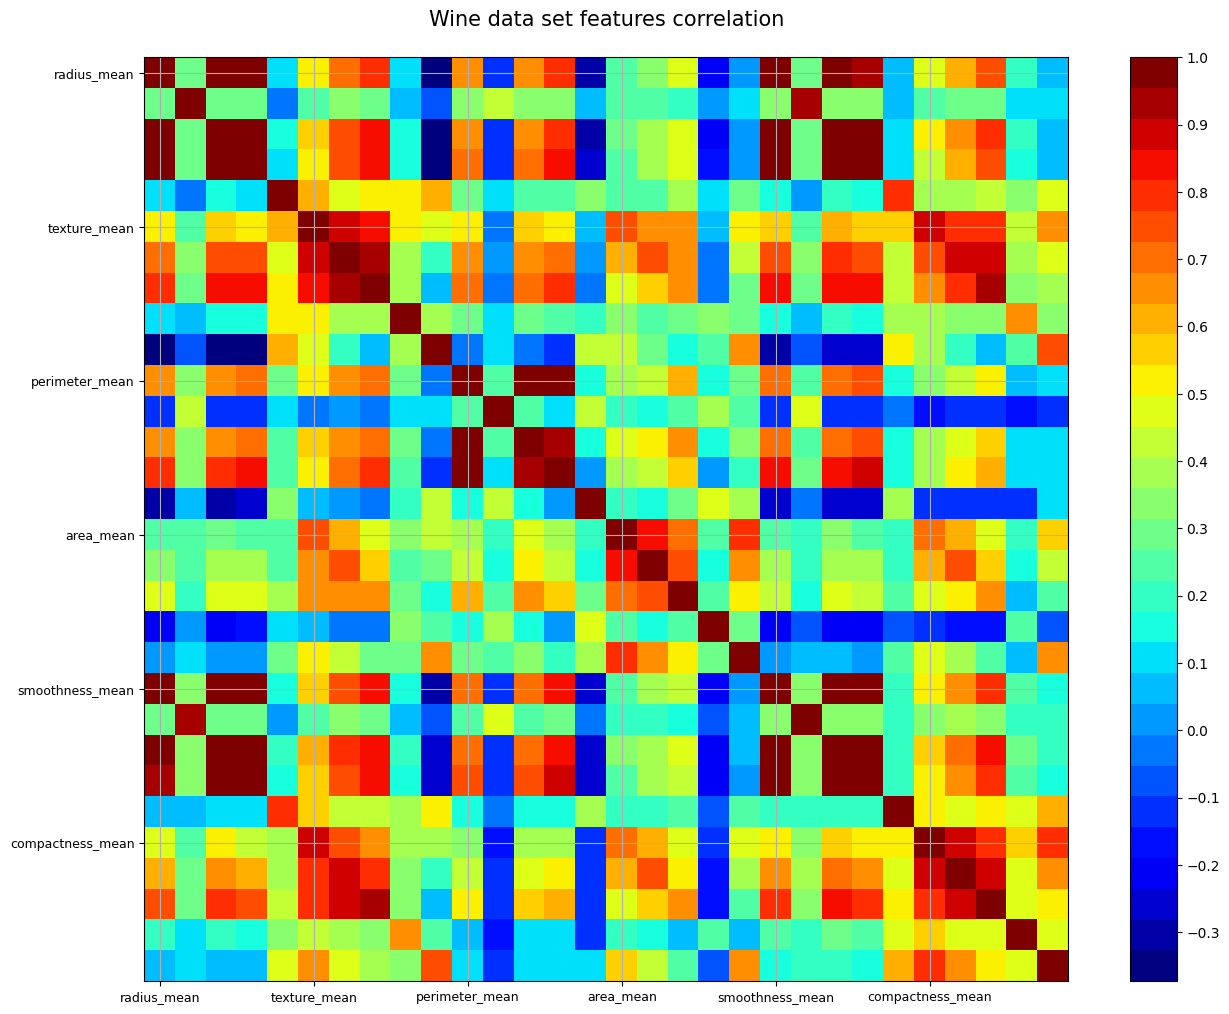

In [ ]:
# to see the correlation between the dataset
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df_clean)

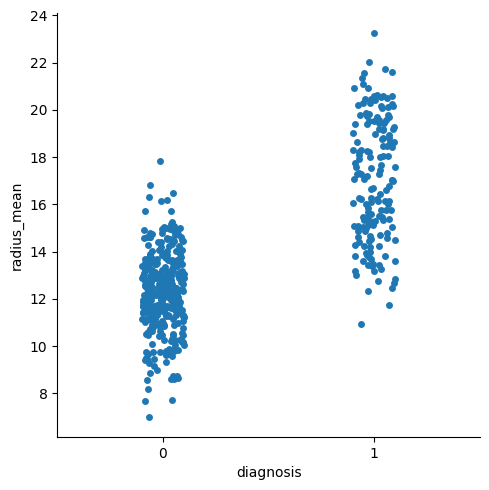

In [ ]:
# To see how well mean radius correlates with diagnosis, we'll plot the data
# separated based on diagnosis category on the x-axis and have the points' y-value

sns.catplot(x = 'diagnosis', y = 'radius_mean', data = df_clean)

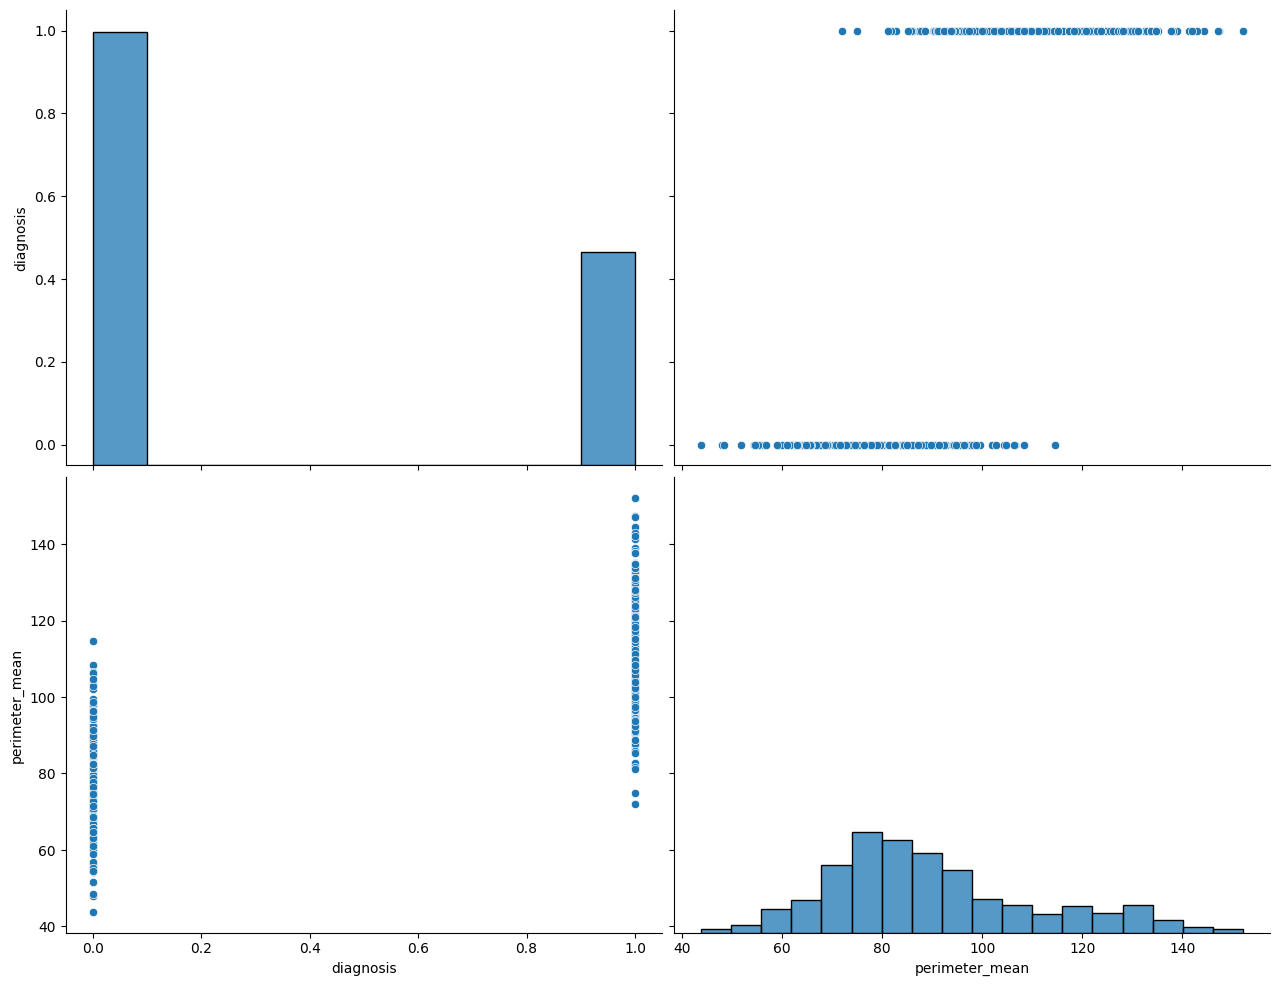

In [ ]:
sns.pairplot(df_clean, vars = ['diagnosis', 'perimeter_mean'], height=5, aspect=1.3);

1.Naive bayes


In [ ]:
df_clean.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578              0.08089   
6          0.09463           0.10900          0.1127              0.07400   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1         0.1812  ...         24.99          23.41            158.8   
2         0.2069  ...         23.57          25.53            152.5   
4         0.1809  ...         22.54          16.67            152.2   
5         0.2087  ...         15.47          23.75            103.4   
6         0.1794  ...         22.88          27.66            153.2   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  

[5 rows x 31 columns]

In [ ]:
# train-test split

X = df_clean.drop('diagnosis',axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(346, 30)

In [ ]:
X_test.shape

(149, 30)

In [ ]:
# fit the trained data using GaussianNB

nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
# predict the test data
y_pred = nb.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 149 test samples is 10


In [ ]:
#classification report

print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        94
           1       0.91      0.91      0.91        55

    accuracy                           0.93       149
   macro avg       0.93      0.93      0.93       149
weighted avg       0.93      0.93      0.93       149



The confusion matrix looks like following...



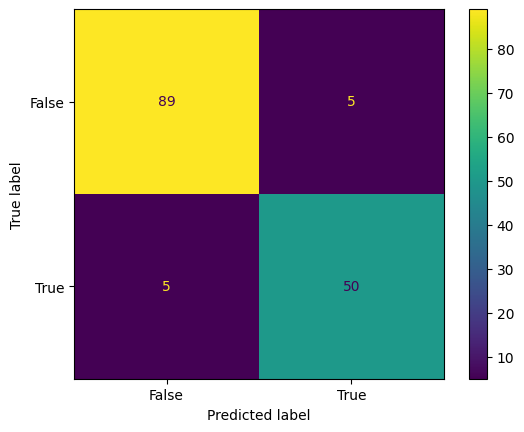

In [ ]:
# confusion matrix

cm = (confusion_matrix(y_test,y_pred))

print("The confusion matrix looks like following...\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


this indicates that the naive bayes is good for this dataset and the error percentage is very small (11)

2.Desicion Tree

In [ ]:
#Importing the Decision tree classifier from the scikit-learn library.
clf_dt = tree.DecisionTreeClassifier(random_state=40)

In [ ]:
# train teh data
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
# to see the default parameters
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [ ]:
#predict the train data
y_train_pred = clf_dt.predict(X_train)

In [ ]:
#predict the test data
y_test_pred = clf_dt.predict(X_test)

In [ ]:
#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.87248322147651


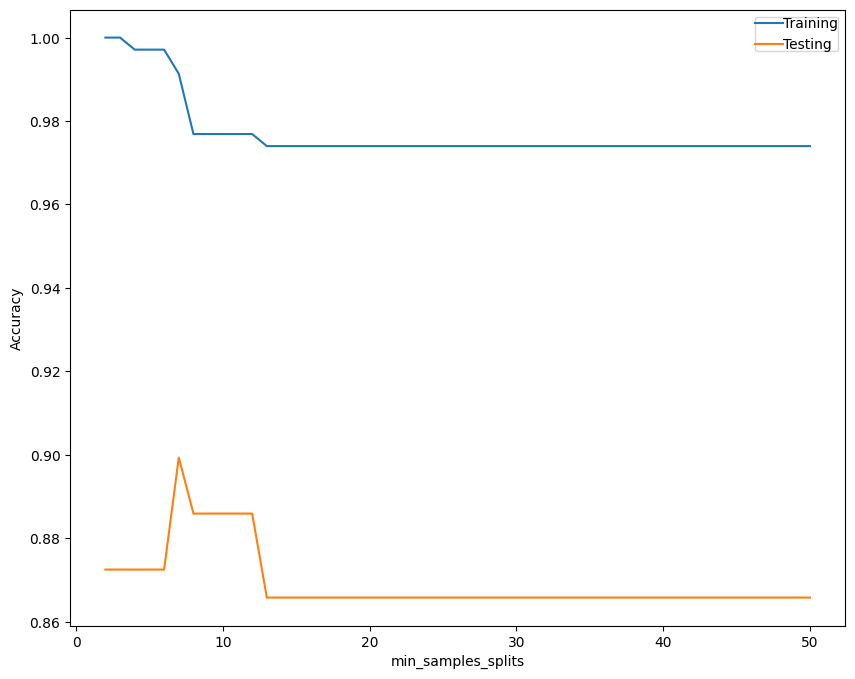

In [ ]:
# to know the minimum number of samples required to split an internal node
min_samples_split = np.linspace(2, 50, 50,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in min_samples_split:
    clf_dt=tree.DecisionTreeClassifier(min_samples_split=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(min_samples_split,accuracy_train)
plt.plot(min_samples_split,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0)
plt.show()


In [ ]:
# Display the structure of the decision tree after hyperparamter tuning
Tuned_tree = tree.DecisionTreeClassifier(random_state=40,max_depth=8, min_samples_split=8)
Tuned_tree.fit(X_train,y_train)
y_train_pred = Tuned_tree.predict(X_train)
y_test_pred = Tuned_tree.predict(X_test)

#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.976878612716763
Accuracy Score on test data:  0.8859060402684564


<Figure size 640x480 with 0 Axes>

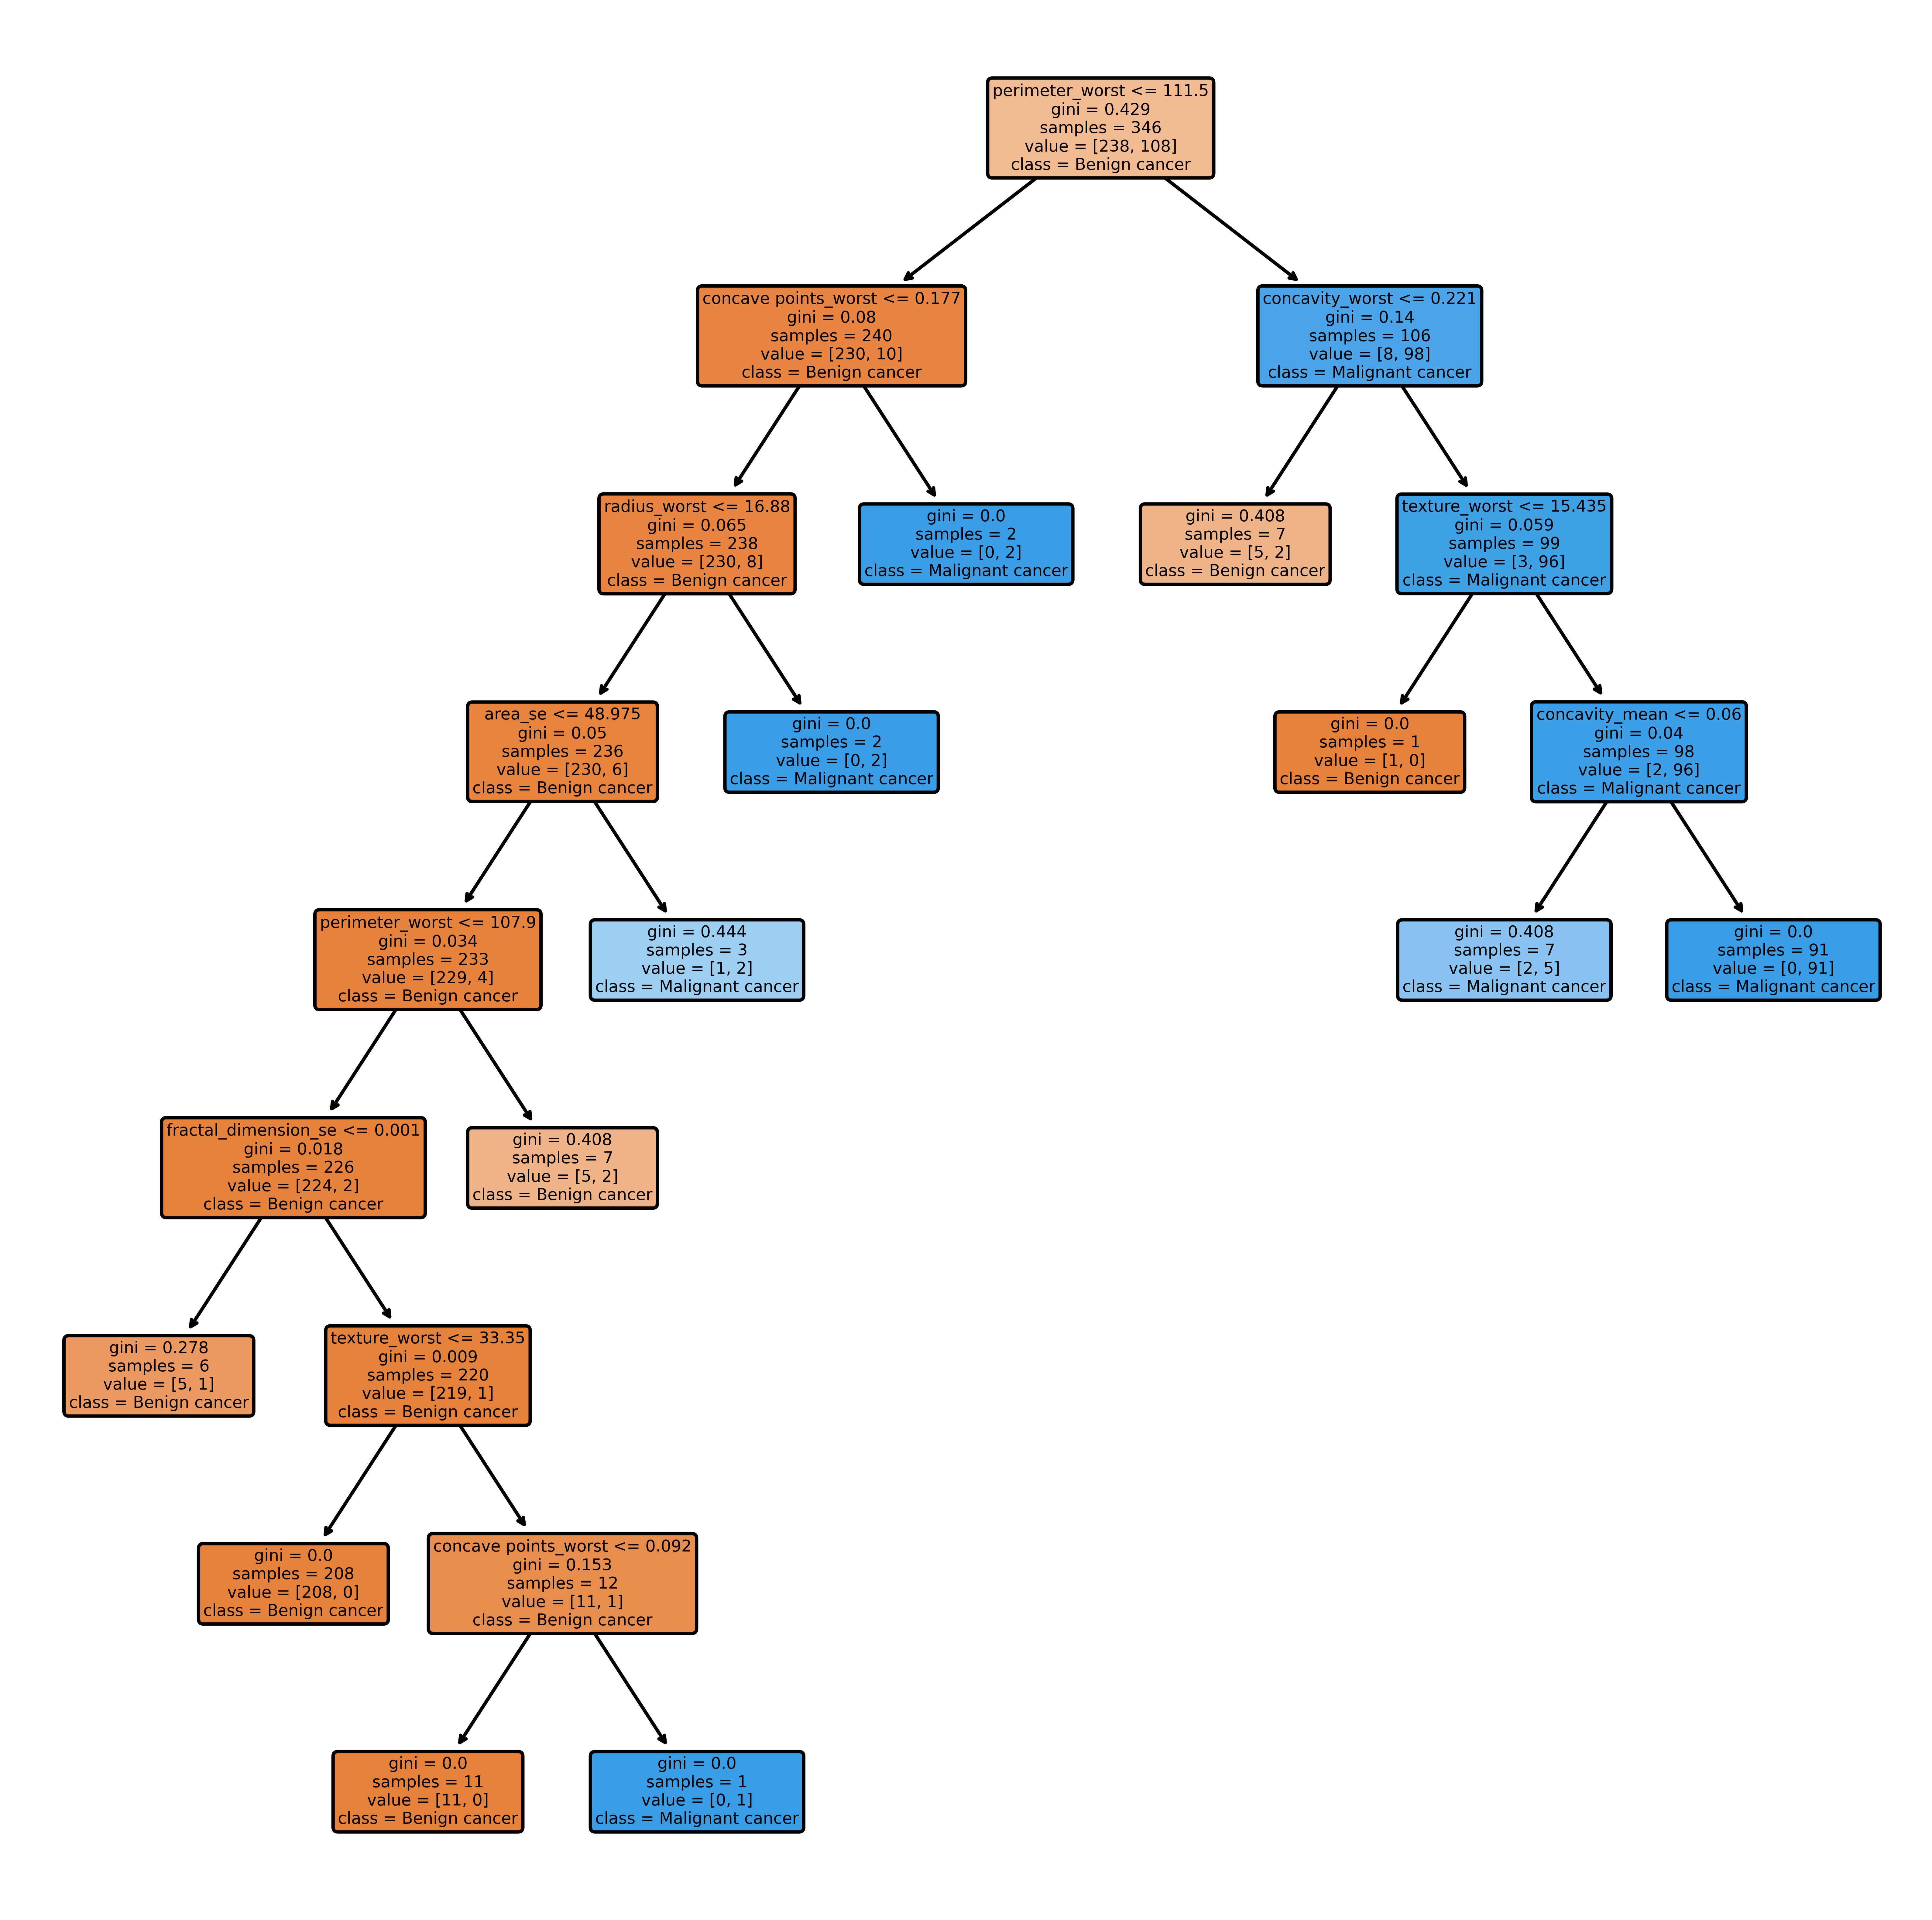

In [ ]:
# visualize the data (tree)
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(Tuned_tree, feature_names = X.columns.tolist(),
               class_names=['Benign cancer','Malignant cancer'],
               filled = True,
              rounded=True)
plt.show()

3.Logistics Regression

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

In [ ]:
# Fit the model on the data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the new data
y_pred = model.predict(X_test)

In [ ]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
209       15.270         12.91           98.17      725.5          0.08182   
412        9.397         21.68           59.75      268.8          0.07969   
444       18.030         16.85          117.50      990.0          0.08947   
469       11.620         18.18           76.38      408.8          0.11750   
107       12.360         18.54           79.01      466.7          0.08477   
..           ...           ...             ...        ...              ...   
49        13.490         22.30           86.91      561.0          0.08752   
551       11.130         22.44           71.49      378.4          0.09566   
238       14.220         27.85           92.55      623.9          0.08223   
311       14.610         15.69           92.68      664.9          0.07618   
41        10.950         21.35           71.90      371.1          0.12270   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
209           0.06230         0.05892             0.031570         0.1359   
412           0.06053         0.03735             0.005128         0.1274   
444           0.12320         0.10900             0.062540         0.1720   
469           0.14830         0.10200             0.055640         0.1957   
107           0.06815         0.02643             0.019210         0.1602   
..                ...             ...                  ...            ...   
49            0.07698         0.04751             0.033840         0.1809   
551           0.08194         0.04824             0.022570         0.2030   
238           0.10390         0.11030             0.044080         0.1342   
311           0.03515         0.01447             0.018770         0.1632   
41            0.12180         0.10440             0.056690         0.1895   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
209                 0.05526  ...        17.380          15.92   
412                 0.06724  ...         9.965          27.99   
444                 0.05780  ...        20.380          22.02   
469                 0.07255  ...        13.360          25.40   
107                 0.06066  ...        13.290          27.49   
..                      ...  ...           ...            ...   
49                  0.05718  ...        15.150          31.82   
551                 0.06552  ...        12.020          28.26   
238                 0.06129  ...        15.750          40.54   
311                 0.05255  ...        16.460          21.75   
41                  0.06870  ...        12.840          35.34   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
209           113.70       932.7            0.1222            0.21860   
412            66.61       301.0            0.1086            0.18870   
444           133.30      1292.0            0.1263            0.26660   
469            88.14       528.1            0.1780            0.28780   
107            85.56       544.1            0.1184            0.19630   
..               ...         ...               ...                ...   
49             99.00       698.8            0.1162            0.17110   
551            77.80       436.6            0.1087            0.17820   
238           102.50       764.0            0.1081            0.24260   
311           103.70       840.8            0.1011            0.07087   
41             87.22       514.0            0.1909            0.26980   

     concavity_worst  concave points_worst  symmetry_worst  \
209          0.29620               0.10350          0.2320   
412          0.18680               0.02564          0.2376   
444          0.42900               0.15350          0.2842   
469          0.31860               0.14160          0.2660   
107          0.19370               0.08442          0.2983   
..               ...                   ...             ...   
49           0.22820               0.12820         

In [ ]:

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


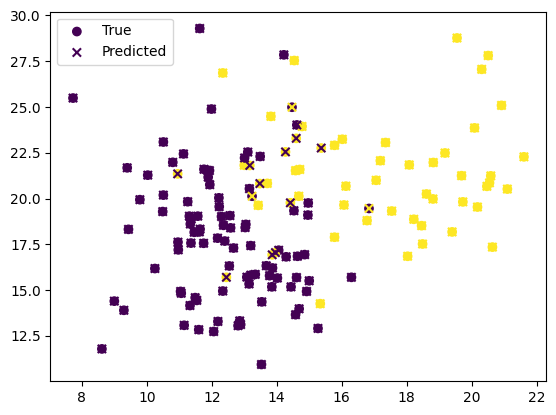

In [ ]:
# Plot the true values
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, label='True')

# Plot the predicted values
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', label='Predicted')

# Add a legend and show the plot
plt.legend()
plt.show()

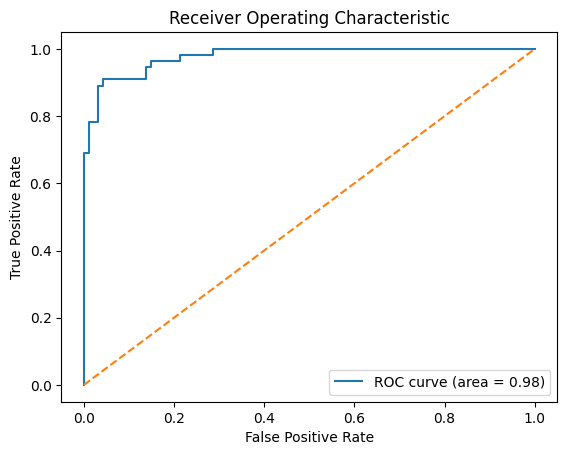

In [ ]:
# Compute the predicted probabilities for the test data
y_score = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold
fpr, tpr, threshold = roc_curve(y_test, y_score)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show the plot
plt.show()


A high AUC value indicates that the model is good at distinguishing between the two classes (0.98), this means that the model is good in distinguishing between them (near 1)

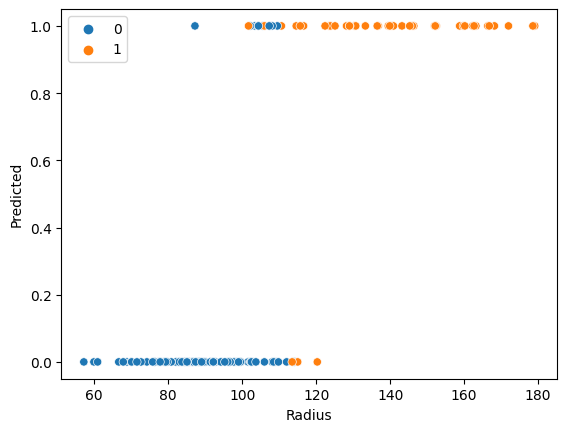

In [ ]:
y_pred = y_pred.squeeze()
X_test_view = X_test['perimeter_worst'].values.squeeze()
sns.scatterplot(x = X_test_view, y = y_test, hue = y_pred)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()


4.KNN

In [ ]:
# Create a k-NN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


In [ ]:
# Calculate and print the confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_2)

Confusion Matrix:
[[91  3]
 [11 44]]


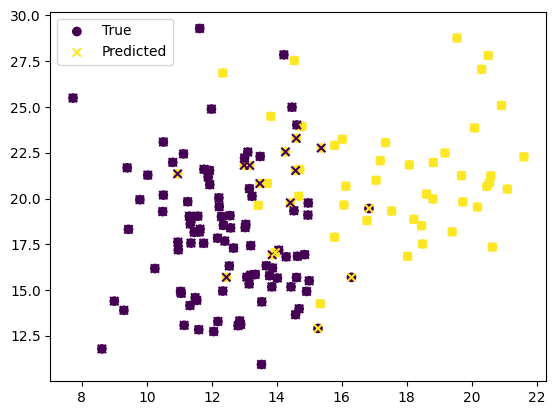

In [ ]:
# Plot the true values
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, label='True')

# Plot the predicted values
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_knn, marker='x', label='Predicted')

# Add a legend and show the plot
plt.legend()
plt.show()


5.Random Forest

In [ ]:
clf=RandomForestClassifier(random_state=40)

#Train the model using the training sets
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#predict the data
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)

In [ ]:
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print("Random Forest test Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  1.0
Random Forest test Accuracy: 0.9194630872483222


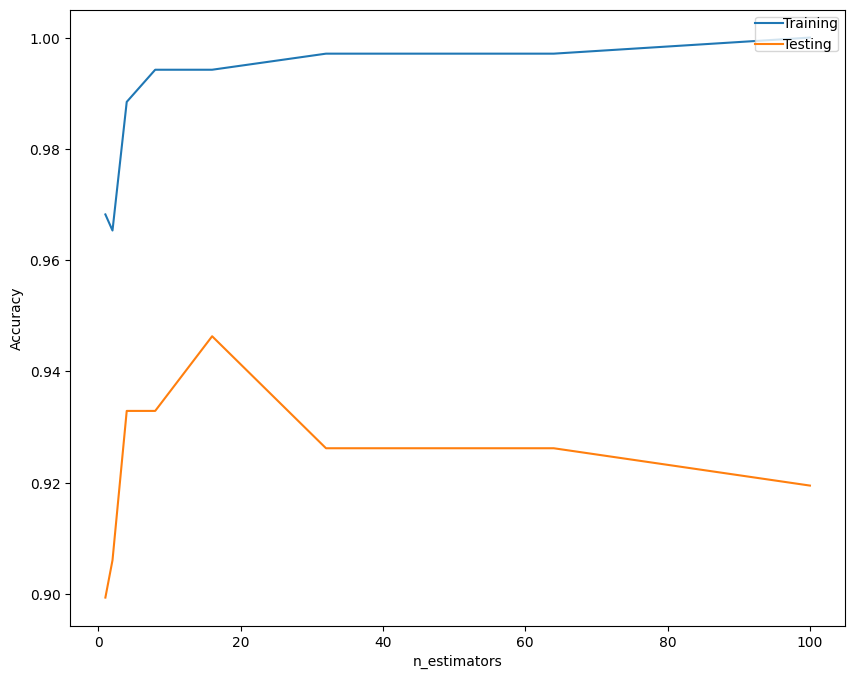

In [ ]:
#hyperparameters tunning
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
accuracy_train,accuracy_test=[],[]

for i in n_estimators:
    clf_rf=RandomForestClassifier(n_estimators=i, random_state=40)
    clf_rf.fit(X_train,y_train)
    y_train_pred_rf = clf_rf.predict(X_train)
    y_test_pred_rf = clf_rf.predict(X_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred_rf))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred_rf))

ax= plt.figure(figsize=(10, 8))
plt.plot(n_estimators,accuracy_train)
plt.plot(n_estimators,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0)
plt.show()


this means that 5 estiators are the best number